In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [3]:
df = pd.read_excel("cf.xlsx", sheet_name = "16FacStaff", dtype ={'ZIP': str, 'FAC STAFF': str}) 

In [4]:
df.head() 

,ZIP,FAC STAFF,Distance
0,02453,FAC,375.0
1,04101,FAC,485.0
2,08243,FAC,126.0
3,10011,FAC,173.0
4,10011,FAC,173.0


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 3 columns):
ZIP          543 non-null object
FAC STAFF    543 non-null object
Distance     537 non-null float64
dtypes: float64(1), object(2)
memory usage: 12.8+ KB


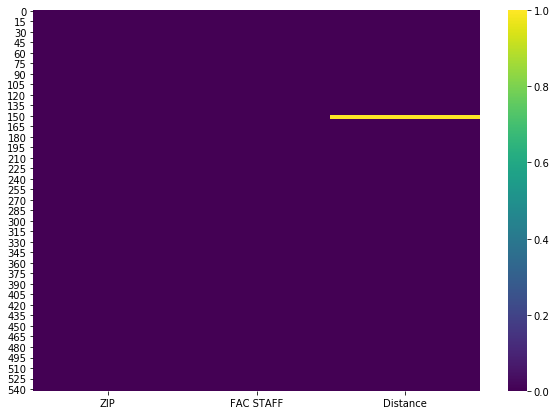

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(), cmap = 'viridis')

In [7]:
values = {'ZIP': 21620, 'FAC STAFF': np.nan, 'Distance':3}
df.fillna(values, inplace = True) 

In [8]:
df.ZIP = df.ZIP.astype(str) 

In [9]:
df['zips'] = df['ZIP'].str.split('-').str.get(0)  

In [10]:
df.drop(['ZIP'], axis = 1, inplace = True)  

In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 3 columns):
FAC STAFF    543 non-null object
Distance     543 non-null float64
zips         543 non-null object
dtypes: float64(1), object(2)
memory usage: 12.8+ KB


For faculty that have zips which result to more than 2.5 hours of commute time (around 150 miles) we can assume that they have moved to Chestertown for the academic year.

In [12]:
# List of all faculty and staff who live more than 150 miles away 
df[df['Distance'] > 150]  

,FAC STAFF,Distance,zips
0,FAC,375.0,02453
1,FAC,485.0,04101
3,FAC,173.0,10011
4,FAC,173.0,10011
5,FAC,259.0,13905
6,FAC,232.0,16648
122,FAC,703.0,47401
123,FAC,703.0,47401
124,FAC,1260.0,66520
148,FAC,800.0,60555


Make distance greater than 150 with the average distance for Chestertown

In [13]:
df.loc[df['Distance'] > 150, 'Distance'] = 3 

#### Faculty carbon footprint

In [14]:
df2 = df[df['FAC STAFF'] == "FAC"]['Distance']

In [15]:
df2.count() 

156

* 70 days in fall semester
* 90 days in spring semester

In [16]:
(df2*2*(70+90)).sum()  

1159488.0

* Average passenger/miles for Faculty for an academic year

In [17]:
(df2).sum()/156  

23.22692307692308

#### Staff carbon footprint

In [18]:
df3 = df[df['FAC STAFF'] == "STAFF"]['Distance']  

In [19]:
df3.count()  

387

* Fall Semester - 70 days
<br>
* Spring Semester - 90 days
<br>
* 4 week leave - 20 days
<br>
* Summer - 72 days

In [20]:
(df3*2*(70+90+(72-20))).sum()

3001835.1999999997

In [21]:
(df3).sum()/387 

18.29405684754522